<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [2]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **(Urclass Quiz) 타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [14]:
### 이곳에서 과제를 진행해 주세요 ###
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
# 상관관계가 가장 높은 특성의 이름 : sqft_living

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **(Urclass Quiz) 기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

540088.0

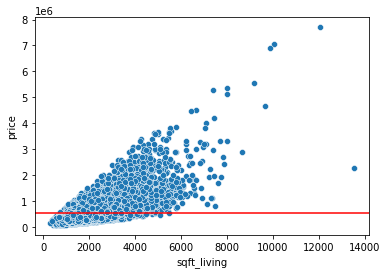

In [27]:
# 회귀문제 이므로 타겟의 평균값을 기준모델로 삼는다.
predict = df['price'].mean().round()

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['sqft_living'],y=df['price'])
plt.axhline(predict, color = 'red')
predict

### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **(Urclass Quiz) sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = df[['sqft_living']]
y_train = df[['price']]

model.fit(X_train, y_train)

X_test = [[15000]]
y_pred = model.predict(X_test).round()

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[4165773.]])

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **(Urclass Quiz) sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [38]:
# 계수
coef = model.coef_.round()

# 절편
inte = model.intercept_.round()

# sqft_living이 15000일 때 예측
print("cosqft_living이 15000인 주택 가격 예측 :", int(y_pred[0]),"/ 1 sqft당 추가금 :",int(coef[0]))

cosqft_living이 15000인 주택 가격 예측 : 4165773 / 1 sqft당 추가금 : 281


### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **(Urclass Quiz) bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [41]:
# bathrooms 특성을 사용하여 모델을 만들어보고 비교
X_train = df[['bathrooms']]
y_train = df[['price']]

model.fit(X_train, y_train)

bath_coef = model.coef_.round()
bath_coef

array([[250327.]])

## 🔥도전과제 (Github - Discussion) 

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.